# 9. MapReduce Parallel Strategy

我们在教程 `04. Explain the Otimizer in Detail` 就讨论过 UltraOpt 优化器的运行机制以及通过**MapReduce**计算策略实现并行计算的原理。故本教程不详细阐述UltraOpt的`MapReduce`并行策略具体原理，只讨论如何**通过合理的配置在不同的计算环境下实现 MapReduce**。

UltraOpt实现MapReduce的本质是让优化器推荐多个配置，然后让不同的计算结点并行地对这些配置进行评价(`Map`)，然后等待所有计算结点完成计算并收集结果(`Reduce`)，用这个结果对优化器进行更新。

UltraOpt使用`joblib.Parallel`实现并行计算

In [1]:
from joblib import parallel_backend

In [2]:
from ultraopt import fmin
from ultraopt.tests.automl import evaluator, config_space

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
import pylab as plt

In [3]:
n_jobs = 4

## 单机threading后端

In [7]:
with parallel_backend("threading"):
    result = fmin(evaluator, config_space, n_jobs=n_jobs, parallel_strategy="MapReduce", n_iterations=40)

100%|██████████| 40/40 [00:08<00:00,  4.95trial/s, best loss: 0.012]


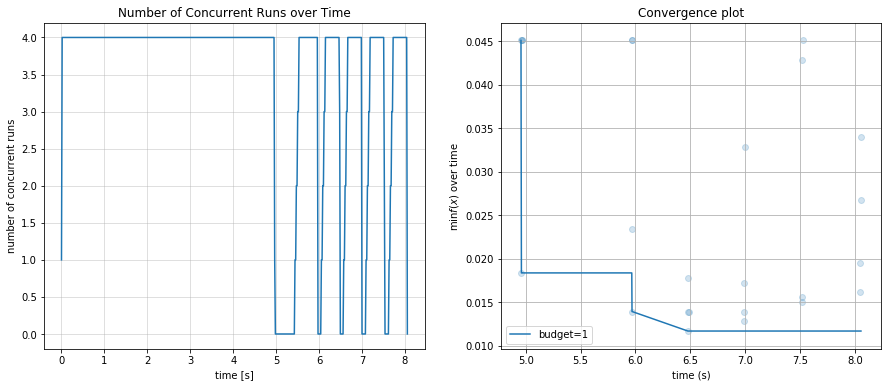

In [17]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.subplot(1, 2, 1)
result.plot_concurrent_over_time();
plt.subplot(1, 2, 2)
result.plot_convergence_over_time();

## 单机multiprocessing后端

In [18]:
with parallel_backend("multiprocessing"):
    result = fmin(evaluator, config_space, n_jobs=n_jobs, parallel_strategy="MapReduce", n_iterations=40)

100%|██████████| 40/40 [00:09<00:00,  4.43trial/s, best loss: 0.012]


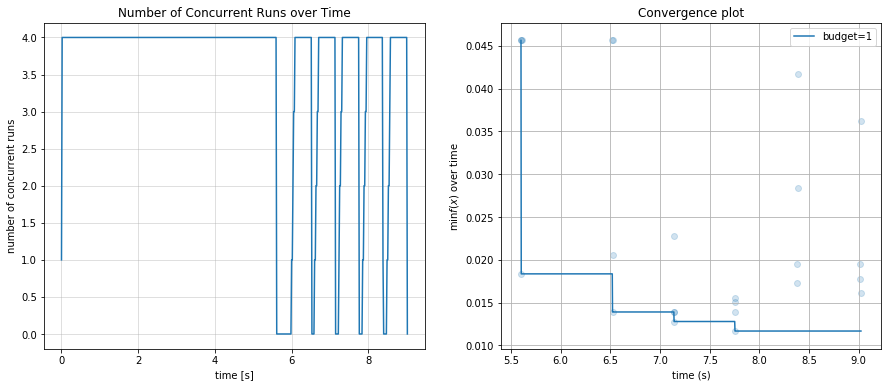

In [19]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.subplot(1, 2, 1)
result.plot_concurrent_over_time();
plt.subplot(1, 2, 2)
result.plot_convergence_over_time();

## 单机loky后端

In [25]:
with parallel_backend("loky"):
    result = fmin(evaluator, config_space, n_jobs=n_jobs, parallel_strategy="MapReduce", n_iterations=40)

100%|██████████| 40/40 [00:07<00:00,  5.18trial/s, best loss: 0.012]


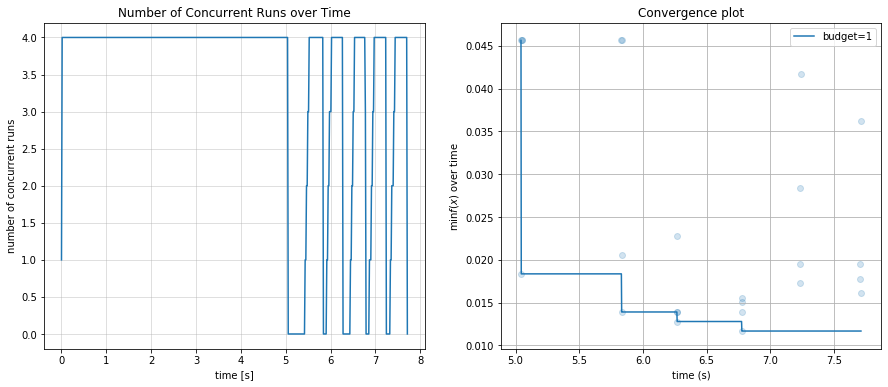

In [26]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.subplot(1, 2, 1)
result.plot_concurrent_over_time();
plt.subplot(1, 2, 2)
result.plot_convergence_over_time();

## 集群pyspark后端

因为在`jupyter`中运行`joblibspark`会抛出`ModuleNotFoundError: No module named 'ipykernel'`异常，故我们提供一个`pyspark_mapreduce.py`脚本

运行后，我们加载 `pyspark-result.pkl` 进行数据分析

In [31]:
from joblib import load
result = load("pyspark-result.pkl")

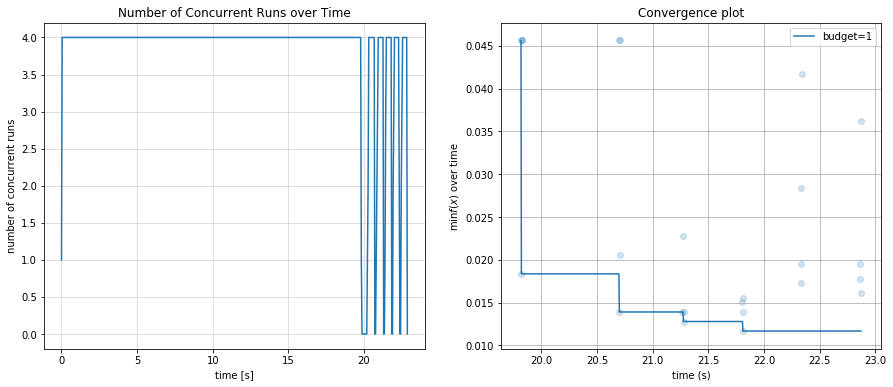

In [32]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.subplot(1, 2, 1)
result.plot_concurrent_over_time();
plt.subplot(1, 2, 2)
result.plot_convergence_over_time();

pyspark花了接近20秒启动计算环境。

## 集群ray后端

In [33]:
from ray.util.joblib import register_ray
register_ray()

In [34]:
with parallel_backend("ray"):
    result = fmin(evaluator, config_space, n_jobs=n_jobs, parallel_strategy="MapReduce", n_iterations=40)

  0%|          | 0/40 [00:00<?, ?trial/s, best loss=?]

2021-01-02 16:47:39,504	INFO resource_spec.py:212 -- Starting Ray with 4.74 GiB memory available for workers and up to 2.37 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2021-01-02 16:47:39,619	WARNING services.py:923 -- Redis failed to start, retrying now.
2021-01-02 16:47:39,852	WARNING services.py:923 -- Redis failed to start, retrying now.
2021-01-02 16:47:40,138	INFO services.py:1165 -- View the Ray dashboard at localhost:8265


(pid=958) /home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(pid=958)   "the number of iterations.", ConvergenceWarning)
(pid=958) /home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(pid=958)   "the number of iterations.", ConvergenceWarning)
(pid=958) /home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(pid=958)   "the number of iterations.", ConvergenceWarning)
(pid=961) /home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(pid=961)   "the number of iterations.", ConvergenceWarning)
(pid=961) /home/tqc/miniconda3/envs/ask/

2021-01-02 16:47:43,332	WARNING pool.py:340 -- The 'context' argument is not supported using ray. Please refer to the documentation for how to control ray initialization.


(pid=1124) /home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(pid=1124)   "the number of iterations.", ConvergenceWarning)
(pid=1124) /home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(pid=1124)   "the number of iterations.", ConvergenceWarning)
(pid=1127) /home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(pid=1127)   "the number of iterations.", ConvergenceWarning)
(pid=1124) /home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(pid=1124)   "the number of iterations.", ConvergenceWarning)
(pid=1127) /home/tqc/miniconda3/

2021-01-02 16:47:46,111	WARNING pool.py:340 -- The 'context' argument is not supported using ray. Please refer to the documentation for how to control ray initialization.


(pid=1161) /home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(pid=1161)   "the number of iterations.", ConvergenceWarning)
(pid=1161) /home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(pid=1161)   "the number of iterations.", ConvergenceWarning)
(pid=1161) /home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(pid=1161)   "the number of iterations.", ConvergenceWarning)
(pid=1158) /home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(pid=1158)   "the number of iterations.", ConvergenceWarning)
(pid=1158) /home/tqc/miniconda3/

2021-01-02 16:47:48,661	WARNING pool.py:340 -- The 'context' argument is not supported using ray. Please refer to the documentation for how to control ray initialization.


(pid=1283) /home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(pid=1283)   "the number of iterations.", ConvergenceWarning)
(pid=1283) /home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(pid=1283)   "the number of iterations.", ConvergenceWarning)
(pid=1283) /home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(pid=1283)   "the number of iterations.", ConvergenceWarning)
(pid=1284) /home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(pid=1284)   "the number of iterations.", ConvergenceWarning)
(pid=1284) /home/tqc/miniconda3/

2021-01-02 16:47:51,966	WARNING pool.py:340 -- The 'context' argument is not supported using ray. Please refer to the documentation for how to control ray initialization.


(pid=1370) /home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(pid=1370)   "the number of iterations.", ConvergenceWarning)
(pid=1370) /home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(pid=1370)   "the number of iterations.", ConvergenceWarning)
(pid=1373) /home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(pid=1373)   "the number of iterations.", ConvergenceWarning)
(pid=1370) /home/tqc/miniconda3/envs/ask/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
(pid=1370)   "the number of iterations.", ConvergenceWarning)
(pid=1373) /home/tqc/miniconda3/

2021-01-02 16:47:54,858	WARNING pool.py:340 -- The 'context' argument is not supported using ray. Please refer to the documentation for how to control ray initialization.


 60%|██████    | 24/40 [00:17<00:11,  1.38trial/s, best loss: 0.014]

2021-01-02 16:47:57,208	WARNING pool.py:340 -- The 'context' argument is not supported using ray. Please refer to the documentation for how to control ray initialization.


 70%|███████   | 28/40 [00:20<00:08,  1.44trial/s, best loss: 0.013]

2021-01-02 16:47:59,741	WARNING pool.py:340 -- The 'context' argument is not supported using ray. Please refer to the documentation for how to control ray initialization.


 80%|████████  | 32/40 [00:22<00:05,  1.52trial/s, best loss: 0.012]

2021-01-02 16:48:02,005	WARNING pool.py:340 -- The 'context' argument is not supported using ray. Please refer to the documentation for how to control ray initialization.


 90%|█████████ | 36/40 [00:24<00:02,  1.58trial/s, best loss: 0.012]

2021-01-02 16:48:04,306	WARNING pool.py:340 -- The 'context' argument is not supported using ray. Please refer to the documentation for how to control ray initialization.


100%|██████████| 40/40 [00:26<00:00,  1.49trial/s, best loss: 0.012]


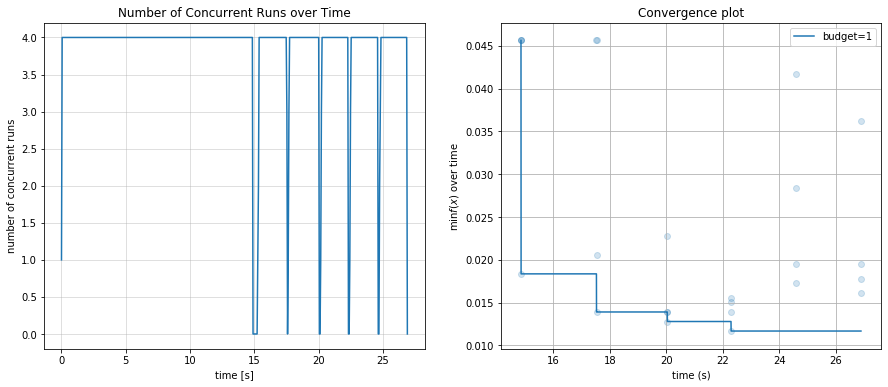

In [35]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.subplot(1, 2, 1)
result.plot_concurrent_over_time();
plt.subplot(1, 2, 2)
result.plot_convergence_over_time();

## 集群dask后端

In [36]:
from dask.distributed import Client
import joblib

client = Client(processes=False)             # create local cluster
# client = Client("scheduler-address:8786")  # or connect to remote cluster

In [37]:
with parallel_backend("dask"):
    result = fmin(evaluator, config_space, n_jobs=n_jobs, parallel_strategy="MapReduce", n_iterations=40)

100%|██████████| 40/40 [00:13<00:00,  3.07trial/s, best loss: 0.012]


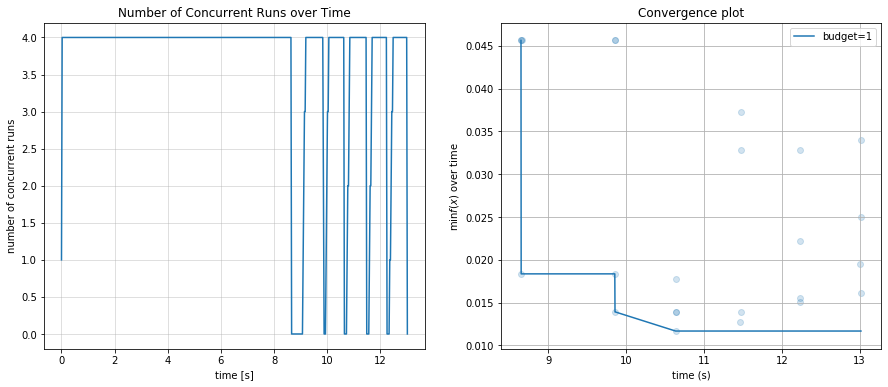

In [38]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.subplot(1, 2, 1)
result.plot_concurrent_over_time();
plt.subplot(1, 2, 2)
result.plot_convergence_over_time();